In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from skimage import io, color

In [2]:
from keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [3]:
# width,height,channels
image_shape = (256,256,3)

In [4]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [5]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(256,256,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(256,256,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(256,256,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(256,256,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(8))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        36928     
__________

In [77]:
batch_size = 32

train_image_gen = image_gen.flow_from_directory('train/',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 364 images belonging to 8 classes.


In [78]:
valid_image_gen = image_gen.flow_from_directory('valid/',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 169 images belonging to 8 classes.


In [79]:
train_image_gen.class_indices

{'bharatanatayam': 0,
 'kathak': 1,
 'kathakali': 2,
 'kuchipudi': 3,
 'manipuri': 4,
 'mohiniyattam': 5,
 'odissi': 6,
 'sattriya': 7}

In [68]:
import warnings
warnings.filterwarnings('ignore')

In [74]:
%%time
results = model.fit_generator(train_image_gen,epochs=150,
                              steps_per_epoch=13,
                              validation_data=valid_image_gen,
                             validation_steps=5,shuffle=True)

Epoch 1/150
13/13 [==============================] - 27s 2s/step - loss: 0.0358 - acc: 0.9895 - val_loss: 0.2077 - val_acc: 0.9600
Epoch 2/150
13/13 [==============================] - 29s 2s/step - loss: 0.0317 - acc: 0.9907 - val_loss: 0.1674 - val_acc: 0.9642
Epoch 3/150
13/13 [==============================] - 28s 2s/step - loss: 0.0244 - acc: 0.9922 - val_loss: 0.2059 - val_acc: 0.9625
Epoch 4/150
13/13 [==============================] - 28s 2s/step - loss: 0.0196 - acc: 0.9930 - val_loss: 0.1809 - val_acc: 0.9650
Epoch 5/150
13/13 [==============================] - 29s 2s/step - loss: 0.0239 - acc: 0.9898 - val_loss: 0.1662 - val_acc: 0.9633
Epoch 6/150
13/13 [==============================] - 29s 2s/step - loss: 0.0126 - acc: 0.9955 - val_loss: 0.1458 - val_acc: 0.9700
Epoch 7/150
13/13 [==============================] - 29s 2s/step - loss: 0.0129 - acc: 0.9967 - val_loss: 0.2099 - val_acc: 0.9575
Epoch 8/150
13/13 [==============================] - 29s 2s/step - loss: 0.0326 - a

Epoch 125/150
13/13 [==============================] - 83s 6s/step - loss: 0.0136 - acc: 0.9943 - val_loss: 0.2010 - val_acc: 0.9642
Epoch 126/150
13/13 [==============================] - 49s 4s/step - loss: 0.0104 - acc: 0.9958 - val_loss: 0.1957 - val_acc: 0.9650
Epoch 127/150
13/13 [==============================] - 47s 4s/step - loss: 0.0170 - acc: 0.9949 - val_loss: 0.2070 - val_acc: 0.9575
Epoch 128/150
13/13 [==============================] - 38s 3s/step - loss: 0.0241 - acc: 0.9923 - val_loss: 0.1396 - val_acc: 0.9650
Epoch 129/150
13/13 [==============================] - 40s 3s/step - loss: 0.0143 - acc: 0.9958 - val_loss: 0.1832 - val_acc: 0.9583
Epoch 130/150
13/13 [==============================] - 43s 3s/step - loss: 0.0166 - acc: 0.9956 - val_loss: 0.1585 - val_acc: 0.9625
Epoch 131/150
13/13 [==============================] - 35s 3s/step - loss: 0.0162 - acc: 0.9941 - val_loss: 0.1871 - val_acc: 0.9625
Epoch 132/150
13/13 [==============================] - 34s 3s/step - 

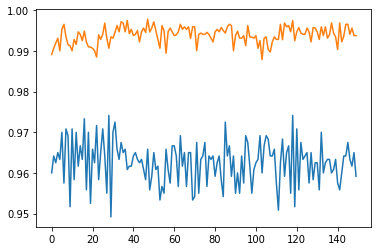

In [75]:
plt.plot(results.history['val_acc'])
plt.plot(results.history['acc'])

In [73]:
model.save('dance_v2.h5')